# Analisis Exploratorio

### Limpieza y Transformación de Datos

1. ¿Hay valores nulos en alguna de las columnas? ¿Qué porcentaje representan?
2. ¿Hay duplicados en los registros? ¿Qué columnas revisarías para identificarlos?
3. ¿El tipo de dato de cada columna es el correcto? Por ejemplo, ¿el año está como número o texto?
4. ¿Hay inconsistencias en los nombres de plataformas, géneros o editores? (Ej: "PS4" vs "PlayStation 4")
5. ¿Hay outliers (valores atípicos) en las ventas? ¿Cómo los identificarías?

### Análisis Exploratorio de Datos - Problematica

6. ¿Cuál es el videojuego más vendido de todos los tiempos?
7. ¿Qué género ha vendido más unidades en total?
8. ¿Qué editor ha generado más ventas globales? 
9. ¿Cuál es la plataforma más popular por ventas globales?
10. ¿Cómo varían las ventas a lo largo de los años? ¿Hay una tendencia clara?
11. ¿Qué región (NA, EU, JP, Otras) representa la mayor parte de las ventas globales?
12. ¿Cuál es el promedio de ventas por videojuego en cada región?
13. ¿Cuáles son los 10 juegos más vendidos en Japón? ¿Son distintos a los de NA o EU?
14. ¿Qué género es más popular en Europa comparado con Japón?
15. ¿Hay alguna relación entre el año de lanzamiento y las ventas totales?

### Visualización de Datos (Data Viz)
16. ¿Cómo se puede visualizar la evolución de las ventas por año? (Ej: línea de tiempo)
17. ¿Qué gráfico usarías para comparar ventas por género en cada región?
18. ¿Cuál sería una buena visualización para mostrar los editores top 5 por ventas?
19. ¿Cómo podrías mostrar la relación entre plataforma y género más vendidos?
20. ¿Qué visualización sería útil para mostrar los juegos con mayor discrepancia de ventas entre regiones?

## 1. Limpieza y Transformación de Datos
### 1.1 Carga de datos en español

In [43]:
# Importar las librerias
import pandas as pd
import numpy as np

In [44]:
# cargar el DataFrame
df_videojuegos = pd.read_csv('juegos.csv', delimiter=',')

# Carga de Datos
display(df_videojuegos)

,Rango,Nombre,Plataforma,Año,Genero,Editor,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Preguntas
#### 1. ¿Hay valores nulos en alguna de las columnas? ¿Qué porcentaje representan? 

In [45]:
# Cantidad de Valores Nulos por columna
nulos = df_videojuegos.isna().sum()
nulos

Rango             0
Nombre            0
Plataforma        0
Año             271
Genero            0
Editor           58
NA_Ventas         0
EU_Ventas         0
JP_Ventas         0
Otras_Ventas      0
Total_Ventas      0
dtype: int64

In [46]:
# Mostrar el porcentaje de valores nulos por columna
porcentaje_nulos = (nulos / len(df_videojuegos)) * 100
porcentaje_nulos

Rango           0.000000
Nombre          0.000000
Plataforma      0.000000
Año             1.632727
Genero          0.000000
Editor          0.349440
NA_Ventas       0.000000
EU_Ventas       0.000000
JP_Ventas       0.000000
Otras_Ventas    0.000000
Total_Ventas    0.000000
dtype: float64

In [47]:
# para visualizar mejor creamos un DataFrame para combiar las columnas
nulos_df = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje (%)': porcentaje_nulos.round(2)
})

nulos_df

,Valores Nulos,Porcentaje (%)
Rango,0,0.00
Nombre,0,0.00
Plataforma,0,0.00
Año,271,1.63
Genero,0,0.00
Editor,58,0.35
NA_Ventas,0,0.00
EU_Ventas,0,0.00
JP_Ventas,0,0.00
Otras_Ventas,0,0.00


In [48]:
# mostrar el filtro con solo las columnas que tienen valores Nulos
nulos_df[nulos_df['Valores Nulos'] > 0]

,Valores Nulos,Porcentaje (%)
Año,271,1.63
Editor,58,0.35


### Pregunta 2.
#### ¿Hay duplicados en los registros? ¿Qué columnas revisarías para identificarlos?

In [49]:
# Contar filas duplicadas
duplicados = df_videojuegos.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

Cantidad de filas duplicadas: 0


In [50]:
# Revisamos si hay duplicados en columnas especificas
duplicados_custom = df_videojuegos[df_videojuegos.duplicated(subset=['Nombre', 'Plataforma', 'Año', 'Genero', 'Editor'])]
display(duplicados_custom)

,Rango,Nombre,Plataforma,Año,Genero,Editor,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.00,0.02,0.0,0.02
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.0,0.01


In [51]:
df_videojuegos = df_videojuegos.drop_duplicates(subset=['Nombre', 'Plataforma', 'Año', 'Genero', 'Editor'], keep = 'last')
display(df_videojuegos)

,Rango,Nombre,Plataforma,Año,Genero,Editor,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Pregunta 3.
#### ¿El tipo de dato de cada columna es el correcto? Por ejemplo, ¿el año está como número o texto?

In [52]:
# verificamos el tipo de datos de cada columna
df_videojuegos.dtypes

Rango             int64
Nombre           object
Plataforma       object
Año             float64
Genero           object
Editor           object
NA_Ventas       float64
EU_Ventas       float64
JP_Ventas       float64
Otras_Ventas    float64
Total_Ventas    float64
dtype: object

El Tipo de dato de la columna "Año" es Float64, lo cual es correcto para el analisis

### Pregunta 4.
#### ¿Hay inconsistencias en los nombres de plataformas, géneros o editores? (Ej: "PS4" vs "PlayStation 4")

In [53]:
# bucle para recorrer todas las columnas de df y devolver una lista de los nombres de todas las columnas
for i in df_videojuegos.columns:
    print(i,'\n', df_videojuegos[i].unique()) # imprime el nombre de la columna seguido de un salto de linea
    # accede a los datos de la columna y devuelve los valores unicos

Rango 
 [    1     2     3 ... 16598 16599 16600]
Nombre 
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
Plataforma 
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Año 
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
Genero 
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Editor 
 ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Kon

In [54]:
# Establecer un diccionario para estandarizar las abreviaturas y ponerles nombre completo
plataforma_dicc = {
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo Entertainment System',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'Super Nintendo Entertainment System',
    'GBA': 'Game Boy Advance',
    '3DS': 'Nintendo 3DS',
    'PS4': 'PlayStation 4',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    'PC': 'PC',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'GC': 'GameCube',
    'WiiU': 'Nintendo Wii U',
    'GEN': 'Sega Genesis',
    'DC': 'Dreamcast',
    'PSV': 'PlayStation Vita',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'TurboGrafx-16',
    '3DO': '3DO Interactive Multiplayer',
    'GG': 'Game Gear',
    'PCFX': 'PC-FX'
}
df_videojuegos['Plataforma'] = df_videojuegos['Plataforma'].replace(plataforma_dicc)

In [23]:
# diccionario para editor
editor_dicc = {
    'Sony Computer Entertainment America': 'Sony Computer Entertainment',
    'Sony Computer Entertainment Europe': 'Sony Computer Entertainment',
    'Electronic Arts Victor': 'Electronic Arts',
    'Activision Blizzard': 'Activision',
    'SquareSoft': 'Square Enix',
    'Square EA': 'Square Enix',
    'Rockstar Games': 'Take-Two Interactive',
    'Bethesda Softworks': 'Bethesda',
    'Sega of America': 'Sega'
}

# Reemplazar valores en la columna Editor
df_videojuegos['Editor'] = df_videojuegos['Editor'].replace(editor_dicc)

In [55]:
# adicional haremos la eliminacion de valores NaN y reemplazar con "Desconocido"
df_videojuegos['Plataforma'] = df_videojuegos['Plataforma'].fillna('Desconocido')
df_videojuegos['Editor'] = df_videojuegos['Editor'].fillna('Desconocido')

In [56]:
df_videojuegos

,Rango,Nombre,Plataforma,Año,Genero,Editor,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
0,1,Wii Sports,Nintendo Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendo Entertainment System,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Nintendo Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Nintendo Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,Game Boy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GameCube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Pregunta 5.
#### ¿Hay outliers (valores atípicos) en las ventas? ¿Cómo los identificarías?

In [57]:
# haremos el resumen estadisticos para identificar los rangos inusuales
df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']].describe()

,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
count,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000
mean,0.264572,0.146656,0.077790,0.048056,0.537350
std,0.816604,0.505380,0.309308,0.188595,1.555037
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


##### Boxplot para visualizar los outliers

In [58]:
# importamos las librerias
import matplotlib.pyplot as plt
import seaborn as sns

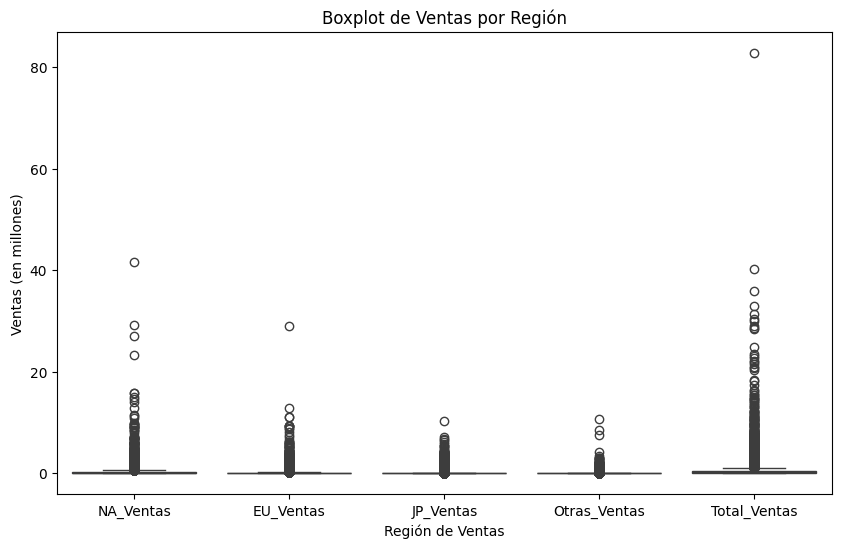

In [33]:
# Configurar tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear Boxplot para cada columna de ventas
sns.boxplot(data=df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']])

# Títulos y etiquetas
plt.title('Boxplot de Ventas por Región')
plt.xlabel('Región de Ventas')
plt.ylabel('Ventas (en millones)')

# Mostrar gráfico
plt.show()

##### Método del Rango Intercuartil (IQR)

In [59]:
# Calcular el IQR( ragno intercuartilico) para cada columna de ventas
Q1 = df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']].quantile(0.25)
Q3 = df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']].quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = ((df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']] < lower_bound) |
            (df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']] > upper_bound))

# Mostrar cuántos outliers hay en cada columna
outliers.sum()


NA_Ventas       1680
EU_Ventas       2081
JP_Ventas       2425
Otras_Ventas    1664
Total_Ventas    1892
dtype: int64

##### Metodo Z-score

In [60]:
from scipy.stats import zscore

# Calcular Z-scores para las columnas de ventas
z_scores = np.abs(zscore(df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']]))

# Mostrar Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas'])

# Identificar los outliers basados en Z-score
outliers_zscore = (z_scores_df > 3)

# Contar los outliers por columna
outliers_zscore.sum()


NA_Ventas       174
EU_Ventas       214
JP_Ventas       238
Otras_Ventas    177
Total_Ventas    181
dtype: int64

In [61]:
# Filtrar los registros que tienen outliers en al menos una columna de ventas
outliers_rows = df_videojuegos[outliers.any(axis=1)]

# Mostrar los registros con outliers
outliers_rows

,Rango,Nombre,Plataforma,Año,Genero,Editor,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
0,1,Wii Sports,Nintendo Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendo Entertainment System,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Nintendo Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Nintendo Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
10399,10401,Yuusha no Kuse ni Namaikida Or 3D,PlayStation Portable,2010.0,Strategy,Sony Computer Entertainment,0.00,0.00,0.11,0.00,0.11
10405,10407,Mobile Suit Gundam Age: Universe Accel / Cosmi...,PlayStation Portable,2012.0,Action,Namco Bandai Games,0.00,0.00,0.11,0.00,0.11
10408,10410,Dragon Ball Z Super Gokuden: Kakusei-Hen,Super Nintendo Entertainment System,1995.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.11,0.00,0.11
10410,10412,Busou Shinki: Battle Masters Mk. 2,PlayStation Portable,2011.0,Action,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11


## Análisis Exploratorio de Datos - Problematica
### pregunta 6.
#### ¿Cuál es el videojuego más vendido de todos los tiempos?

In [62]:
# verificamos si la columna "Total_Ventas" no tiene valores nulos
df_videojuegos['Total_Ventas'].isnull().sum()

np.int64(0)

In [63]:
#Para Encontrar el juego mas vendido 
# Primero ordenar el DataFrame por la columna Total_Ventas en orden descendente
df_mas_vendido = df_videojuegos.sort_values(by='Total_Ventas', ascending=False)

# Mostrar el primer registro (el juego con más ventas)
df_mas_vendido.head(1)


,Rango,Nombre,Plataforma,Año,Genero,Editor,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
0,1,Wii Sports,Nintendo Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


El Videojuego mas vendido de todos los tiempos es: Wii Sport

### Pregunta 7.
#### ¿Qué género ha vendido más unidades en total?

In [64]:
# Agrupar por género y sumar ventas en cada región
ventas_por_genero= df_videojuegos.groupby('Genero')[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas', 'Total_Ventas']].sum().sort_values(by='Total_Ventas',ascending=False)

# Mostrar el resultado
ventas_por_genero

,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas,Total_Ventas
Genero,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,681.24,376.62,135.37,134.75,1328.37
Shooter,582.60,313.27,38.26,102.69,1037.35
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


In [17]:
# Mostrar el género más vendido en cada región
genero_top_na = ventas_por_genero['NA_Ventas'].idxmax()
genero_top_eu = ventas_por_genero['EU_Ventas'].idxmax()
genero_top_jp = ventas_por_genero['JP_Ventas'].idxmax()
genero_top_otras = ventas_por_genero['Otras_Ventas'].idxmax()
genero_total = ventas_por_genero['Total_Ventas'].idxmax()

print("Género más vendido en Norteamérica:", genero_top_na)
print("Género más vendido en Europa:", genero_top_eu)
print("Género más vendido en Japón:", genero_top_jp)
print("Género más vendido en Otras Regiones:", genero_top_otras)
print()
print("GÉNERO MAS VENDIDO EN TOTAL:", genero_total)

Género más vendido en Norteamérica: Action
Género más vendido en Europa: Action
Género más vendido en Japón: Role-Playing
Género más vendido en Otras Regiones: Action

GÉNERO MAS VENDIDO EN TOTAL: Action


### Pregunta 8.
#### ¿Qué editor ha generado más ventas globales?

In [65]:
# agruparemos los Editores y sumaremos las ventas totales
ventas_por_editor = df_videojuegos.groupby('Editor')['Total_Ventas'].sum().sort_values(ascending=False)

# Mostrar el resultado
ventas_por_editor


Editor
Nintendo                       1786.54
Electronic Arts                1107.76
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
                                ...   
Commseed                          0.01
Takuyo                            0.01
Interchannel-Holon                0.01
Ascaron Entertainment             0.01
Epic Games                        0.01
Name: Total_Ventas, Length: 579, dtype: float64

In [66]:
# MOSTRAR EL TOP 10 EDITORES EXITOSOS
# Mostrar el editor con más ventas
editor_top = ventas_por_editor.head(10)
editor_top

Editor
Nintendo                        1786.54
Electronic Arts                 1107.76
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Total_Ventas, dtype: float64

In [67]:
#EDITOR QUE LIDERA EN CADA REGION

# Agrupar por editor y sumar ventas por región
ventas_editor_region = df_videojuegos.groupby('Editor')[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].sum()

# Mostrar el editor con más ventas en cada región
ventas_editor_region.idxmax()


NA_Ventas              Nintendo
EU_Ventas              Nintendo
JP_Ventas              Nintendo
Otras_Ventas    Electronic Arts
dtype: object

### Pregunta 9.
#### ¿Cuál es la plataforma más popular por ventas globales?

In [68]:
# AGRUPAREMOS POR PLATAFORMA Y SUMAREMOS LAS VENTAS TORTALES

# Agrupar por plataforma y sumar las ventas totales
ventas_por_plataforma = df_videojuegos.groupby('Plataforma')['Total_Ventas'].sum().sort_values(ascending=False)

# Mostrar el resultado completo
ventas_por_plataforma

Plataforma
PlayStation 2                          1255.64
Xbox 360                                979.96
PlayStation 3                           955.28
Nintendo Wii                            926.69
Nintendo DS                             822.49
PlayStation                             730.66
Game Boy Advance                        318.50
PlayStation Portable                    296.28
PlayStation 4                           278.10
PC                                      258.82
Xbox                                    258.26
Game Boy                                255.45
Nintendo Entertainment System           251.07
Nintendo 3DS                            247.46
Nintendo 64                             218.88
Super Nintendo Entertainment System     200.05
GameCube                                199.36
Xbox One                                141.06
Atari 2600                               97.08
Nintendo Wii U                           81.86
PlayStation Vita                         61.93
Se

In [69]:
# MOSTRAR EL TOP 10 PLATAFORMA EXITOSAS
# Mostrar el editor con más ventas
plataforma_top = ventas_por_plataforma.head(10)
plataforma_top

Plataforma
PlayStation 2           1255.64
Xbox 360                 979.96
PlayStation 3            955.28
Nintendo Wii             926.69
Nintendo DS              822.49
PlayStation              730.66
Game Boy Advance         318.50
PlayStation Portable     296.28
PlayStation 4            278.10
PC                       258.82
Name: Total_Ventas, dtype: float64

In [70]:
# PLATAFFORMA QUE LIDERA EN CADA REGION

# Agrupar por plataforma y sumar ventas por región
ventas_plataforma_region = df_videojuegos.groupby('Plataforma')[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].sum()

# Mostrar el editor con más ventas en cada región
ventas_plataforma_region.idxmax()

NA_Ventas            Xbox 360
EU_Ventas       PlayStation 3
JP_Ventas         Nintendo DS
Otras_Ventas    PlayStation 2
dtype: object

### Pregunta 10.
#### ¿Cómo varían las ventas a lo largo de los años? ¿Hay una tendencia clara?

In [71]:
# Verificamos si hay valores nulos en la columna Año
df_videojuegos['Año'].isnull().sum()

np.int64(270)

In [72]:
# ELiminamos para este analisis
df_filtrado = df_videojuegos[df_videojuegos['Año'].notnull()]


In [73]:
# Ventas por Año
# Agrupar por año y sumar las ventas globales
ventas_por_año = df_filtrado.groupby('Año')['Total_Ventas'].sum()
ventas_por_año

Año
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    360.98
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Total_Ventas, dtype: float64

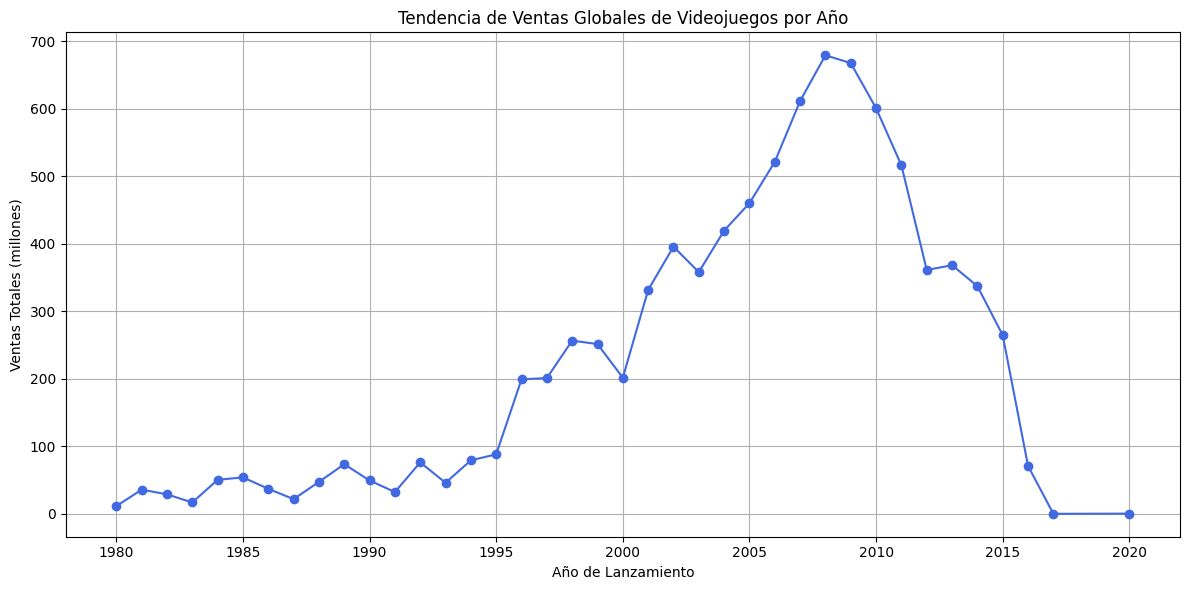

In [82]:
# Creamos gráfico de líneas para ver la tendencia
plt.figure(figsize=(12, 6))
ventas_por_año.plot(kind='line', marker='o', color='royalblue')
plt.title('Tendencia de Ventas Globales de Videojuegos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

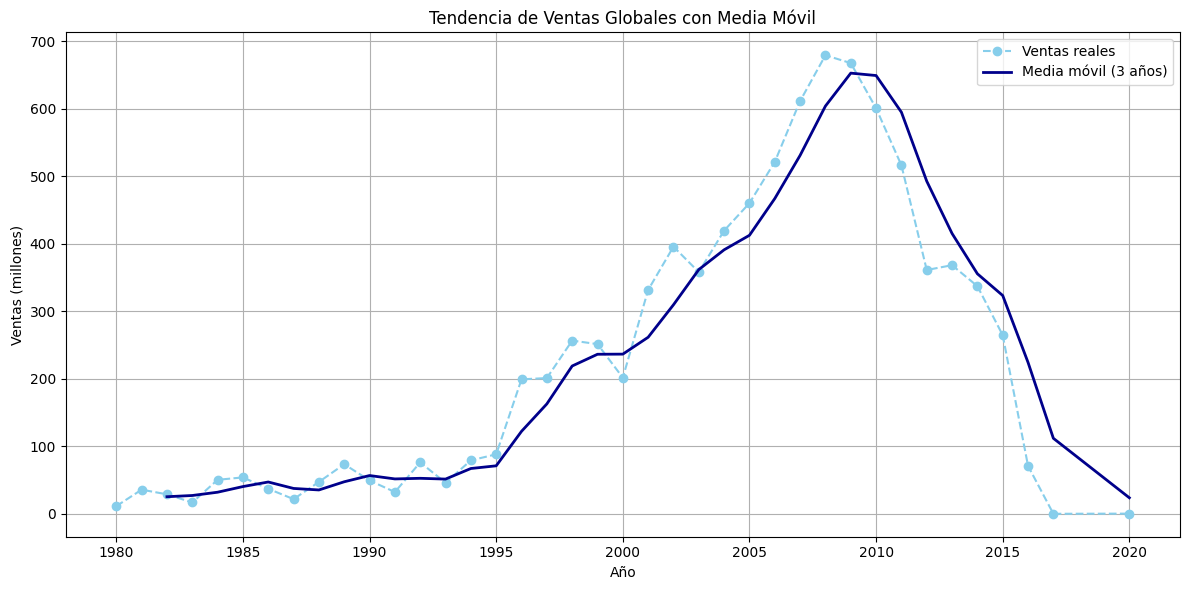

In [85]:
# Calcular media móvil de 3 años para suavizar la curva
ventas_suavizadas = ventas_por_año.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(ventas_por_año.index, ventas_por_año, label='Ventas reales', color='skyblue', linestyle='--', marker='o')
plt.plot(ventas_suavizadas.index, ventas_suavizadas, label='Media móvil (3 años)', color='darkblue', linewidth=2)
plt.title('Tendencia de Ventas Globales con Media Móvil')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Pregunta 11.
#### ¿Qué región (NA, EU, JP, Otras) representa la mayor parte de las ventas globales?

In [88]:
# sumamos las ventas por region
ventas_por_region = df_videojuegos[['NA_Ventas','EU_Ventas','JP_Ventas','Otras_Ventas']].sum()
ventas_por_region

NA_Ventas       4390.84
EU_Ventas       2433.90
JP_Ventas       1291.00
Otras_Ventas     797.53
dtype: float64

In [89]:
# Calculamos porcentaje de participación por región
ventas_por_region_pct = (ventas_por_region / ventas_por_region.sum()) * 100
ventas_por_region_pct

NA_Ventas       49.261831
EU_Ventas       27.306477
JP_Ventas       14.484022
Otras_Ventas     8.947670
dtype: float64

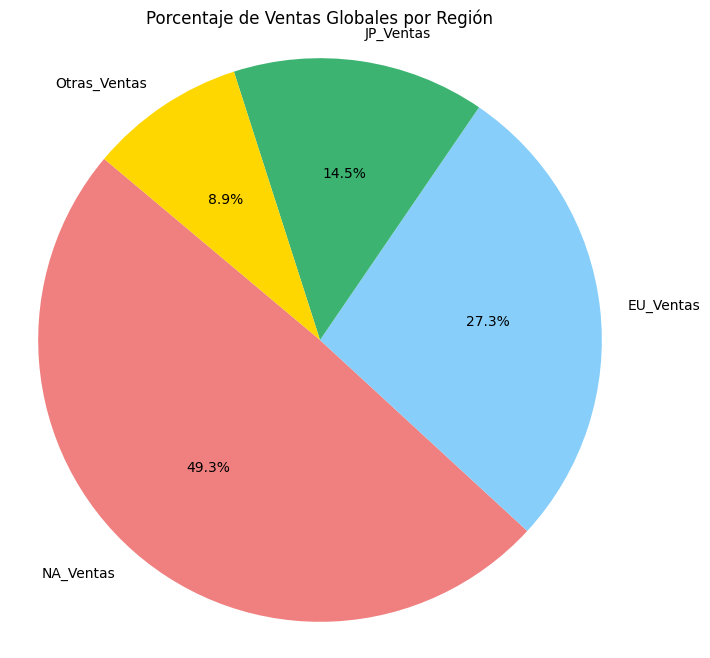

In [91]:
# Para visualizar mejor hacemos gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_region_pct, labels=ventas_por_region_pct.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'mediumseagreen', 'gold'])
plt.title('Porcentaje de Ventas Globales por Región')
plt.axis('equal')  # Hacer que el gráfico sea un círculo
plt.show()


### Pregunta 12.
#### ¿Cuál es el promedio de ventas por videojuego en cada región?

In [93]:
# Primero calculamos promedio de ventas por videojuego en cada región
promedio_ventas_por_region = df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].mean()
promedio_ventas_por_region

NA_Ventas       0.264572
EU_Ventas       0.146656
JP_Ventas       0.077790
Otras_Ventas    0.048056
dtype: float64

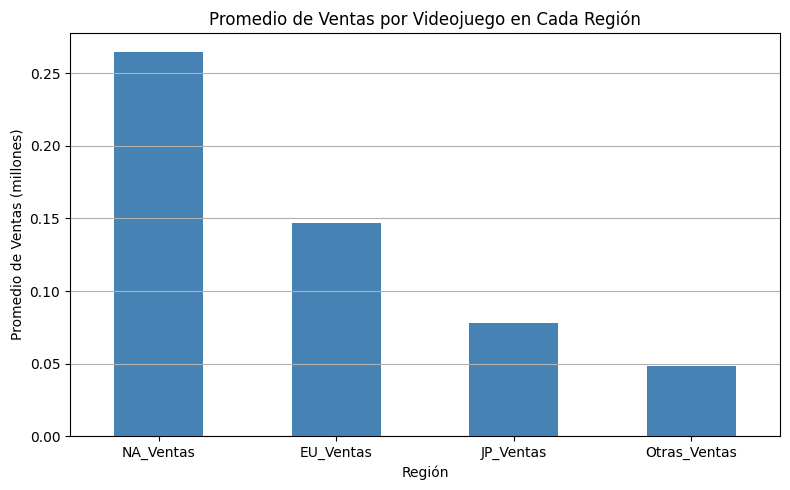

In [96]:
## Para visualizar mejor creamos un grafico de barras
plt.figure(figsize=(8, 5))
promedio_ventas_por_region.plot(kind='bar', color='steelblue')

plt.title('Promedio de Ventas por Videojuego en Cada Región')
plt.xlabel('Región')
plt.ylabel('Promedio de Ventas (millones)')
plt.xticks(rotation=0)
plt.grid(axis='y')# para las etiquetas del eje x no esten rotadas
plt.tight_layout()# agrega una linea horizontal
plt.show()


### Pregunta 13.
#### ¿Cuáles son los 10 juegos más vendidos en Japón? ¿Son distintos a los de NA o EU?

In [97]:
# Top 10 juegos más vendidos en Japón
top10_japon = df_videojuegos[['Nombre', 'JP_Ventas']].sort_values(by='JP_Ventas', ascending=False).head(10)
top10_japon

,Nombre,JP_Ventas
4,Pokemon Red/Pokemon Blue,10.22
12,Pokemon Gold/Pokemon Silver,7.20
1,Super Mario Bros.,6.81
6,New Super Mario Bros.,6.50
20,Pokemon Diamond/Pokemon Pearl,6.04
26,Pokemon Black/Pokemon White,5.65
25,Pokemon Ruby/Pokemon Sapphire,5.38
41,Animal Crossing: Wild World,5.33
27,Brain Age 2: More Training in Minutes a Day,5.32
214,Monster Hunter Freedom 3,4.87


In [99]:
## Sacaremos el top 10 de NA Y EU

# Top 10 juegos más vendidos en Norteamérica
top10_na = df_videojuegos[['Nombre', 'NA_Ventas']].sort_values(by='NA_Ventas', ascending=False).head(10)

# Top 10 juegos más vendidos en Europa
top10_eu = df_videojuegos[['Nombre', 'EU_Ventas']].sort_values(by='EU_Ventas', ascending=False).head(10)

# Mostrar resultados
print("Top 10 en Japón:")
print(top10_japon['Nombre'].tolist())

print("\nTop 10 en Norteamérica:")
print(top10_na['Nombre'].tolist())

print("\nTop 10 en Europa:")
print(top10_eu['Nombre'].tolist())

Top 10 en Japón:
['Pokemon Red/Pokemon Blue', 'Pokemon Gold/Pokemon Silver', 'Super Mario Bros.', 'New Super Mario Bros.', 'Pokemon Diamond/Pokemon Pearl', 'Pokemon Black/Pokemon White', 'Pokemon Ruby/Pokemon Sapphire', 'Animal Crossing: Wild World', 'Brain Age 2: More Training in Minutes a Day', 'Monster Hunter Freedom 3']

Top 10 en Norteamérica:
['Wii Sports', 'Super Mario Bros.', 'Duck Hunt', 'Tetris', 'Mario Kart Wii', 'Wii Sports Resort', 'Kinect Adventures!', 'New Super Mario Bros. Wii', 'Wii Play', 'Super Mario World']

Top 10 en Europa:
['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', 'Nintendogs', 'Grand Theft Auto V', 'Brain Age: Train Your Brain in Minutes a Day', 'New Super Mario Bros.', 'Wii Play', 'Pokemon Red/Pokemon Blue', 'Wii Fit Plus']


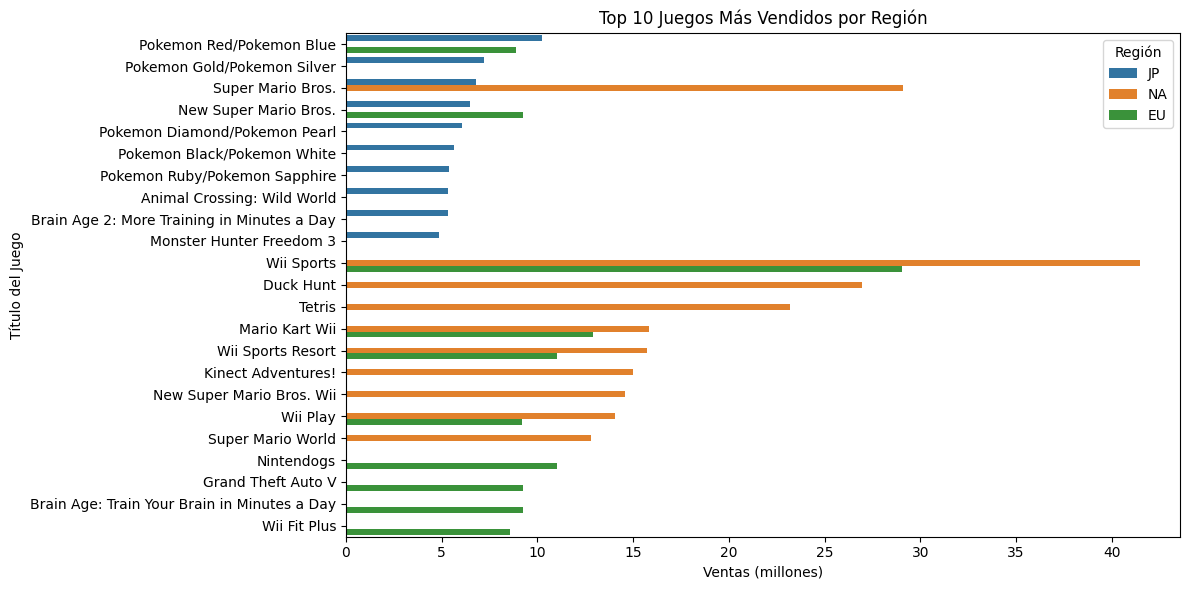

In [100]:
# Comparar visualmente los top 5 en cada región
import seaborn as sns

# Preparar data combinada
top10_japon['Región'] = 'JP'
top10_na['Región'] = 'NA'
top10_eu['Región'] = 'EU'

# Renombrar columnas para unir
top10_japon = top10_japon.rename(columns={'JP_Ventas': 'Ventas'})
top10_na = top10_na.rename(columns={'NA_Ventas': 'Ventas'})
top10_eu = top10_eu.rename(columns={'EU_Ventas': 'Ventas'})

# Unir todos
df_top10_todos = pd.concat([top10_japon, top10_na, top10_eu])

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10_todos, x='Ventas', y='Nombre', hue='Región')
plt.title('Top 10 Juegos Más Vendidos por Región')
plt.xlabel('Ventas (millones)')
plt.ylabel('Título del Juego')
plt.legend(title='Región')
plt.tight_layout()
plt.show()


### Pregunta 14.
#### ¿Qué género es más popular en Europa comparado con Japón?

In [103]:
# primero agrupamo por género en Europa y Japón
#agrupamos el genero y sumamos las 2 regiones
ventas_genero_eu_jp = df_videojuegos.groupby('Genero')[['EU_Ventas', 'JP_Ventas']].sum()

# Ordenar por EU_Ventas para comparar mejor
ventas_genero_eu_jp = ventas_genero_eu_jp.sort_values(by='EU_Ventas', ascending=False)
ventas_genero_eu_jp


,EU_Ventas,JP_Ventas
Genero,,
Action,525.00,159.95
Sports,376.62,135.37
Shooter,313.27,38.26
Racing,238.39,56.69
Misc,215.98,107.76
Platform,201.63,130.77
Role-Playing,188.06,352.31
Simulation,113.38,63.70
Fighting,101.32,87.35


In [107]:
# Agregamos una columna con la diferencia de ventas entre regiones
ventas_genero_eu_jp['Diferencia_EU_JP'] = ventas_genero_eu_jp['EU_Ventas'] - ventas_genero_eu_jp['JP_Ventas']
ventas_genero_eu_jp

,EU_Ventas,JP_Ventas,Diferencia_EU_JP
Genero,,,
Action,525.00,159.95,365.05
Sports,376.62,135.37,241.25
Shooter,313.27,38.26,275.01
Racing,238.39,56.69,181.70
Misc,215.98,107.76,108.22
Platform,201.63,130.77,70.86
Role-Playing,188.06,352.31,-164.25
Simulation,113.38,63.70,49.68
Fighting,101.32,87.35,13.97


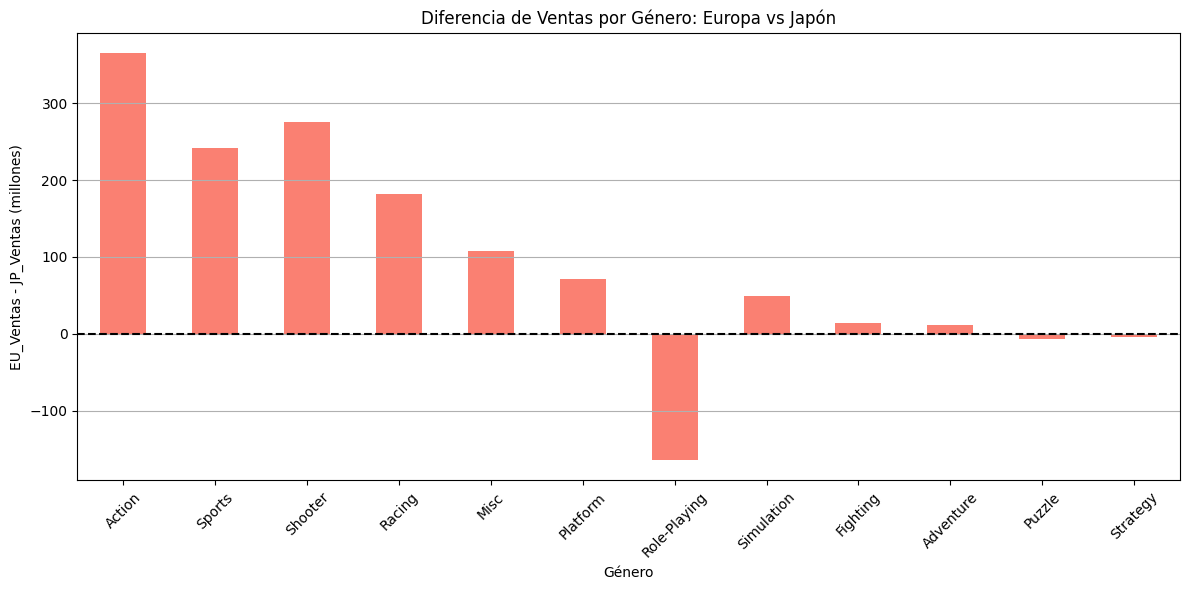

In [109]:
# para visualizarlo mejor crearemos un gráfico de barras para las diferencias
plt.figure(figsize=(12, 6))
ventas_genero_eu_jp['Diferencia_EU_JP'].plot(kind='bar', color='salmon')

plt.title('Diferencia de Ventas por Género: Europa vs Japón')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.ylabel('EU_Ventas - JP_Ventas (millones)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Barras por encima de 0: géneros donde Europa tiene más ventas que Japón.
#### Barras por debajo de 0: géneros donde Japón es más fuerte que Europa.

### Preguna 15.
#### ¿Hay alguna relación entre el año de lanzamiento y las ventas totales?

In [117]:
## Agrupamos por año y sumamos las ventas totales
ventas_por_año = df_filtrado.groupby('Año')['Total_Ventas'].sum().reset_index()
display(ventas_por_año.head())

,Año,Total_Ventas
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


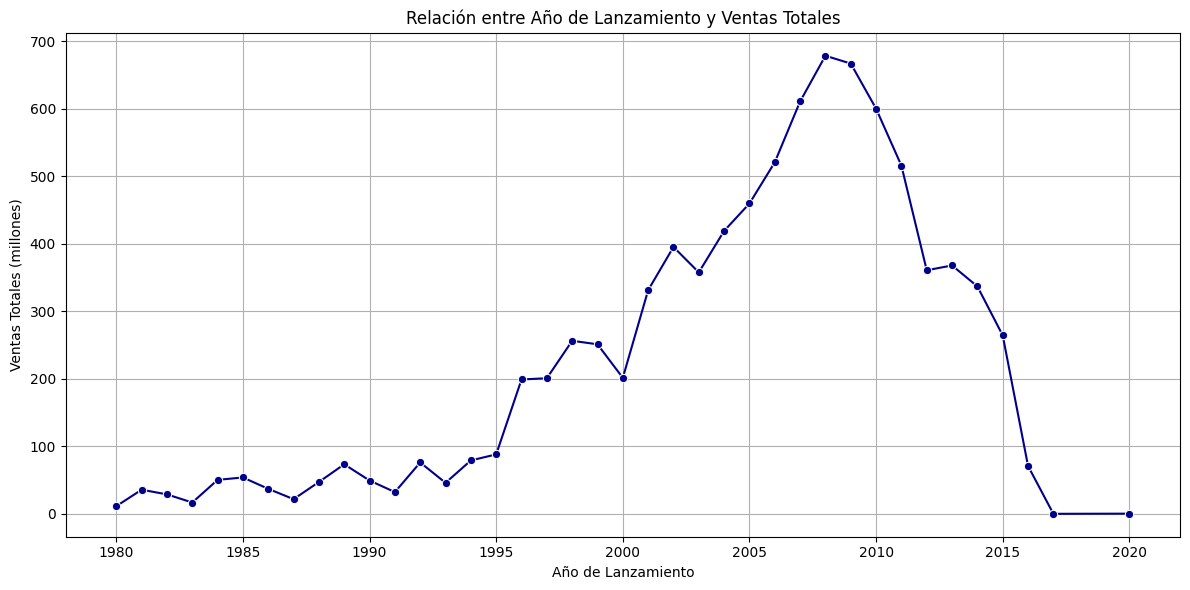

In [111]:
# Para visualizar mejor relacion entre años y ventas totales
# Gráfico de línea para ver la tendencia de ventas totales por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_año, x='Año', y='Total_Ventas', marker='o', color='darkblue')

plt.title('Relación entre Año de Lanzamiento y Ventas Totales')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
# Calculamos la correlación entre el año y las ventas totales
correlacion = df_filtrado[['Año', 'Total_Ventas']].corr()
correlacion

,Año,Total_Ventas
Año,1.000000,-0.074817
Total_Ventas,-0.074817,1.000000


Si el valor está cerca de 1: hay una fuerte relación positiva (a mayor año, mayores ventas).

Si está cerca de -1: hay una relación negativa (los juegos antiguos vendían más).

Si está cerca de 0: no hay relación clara

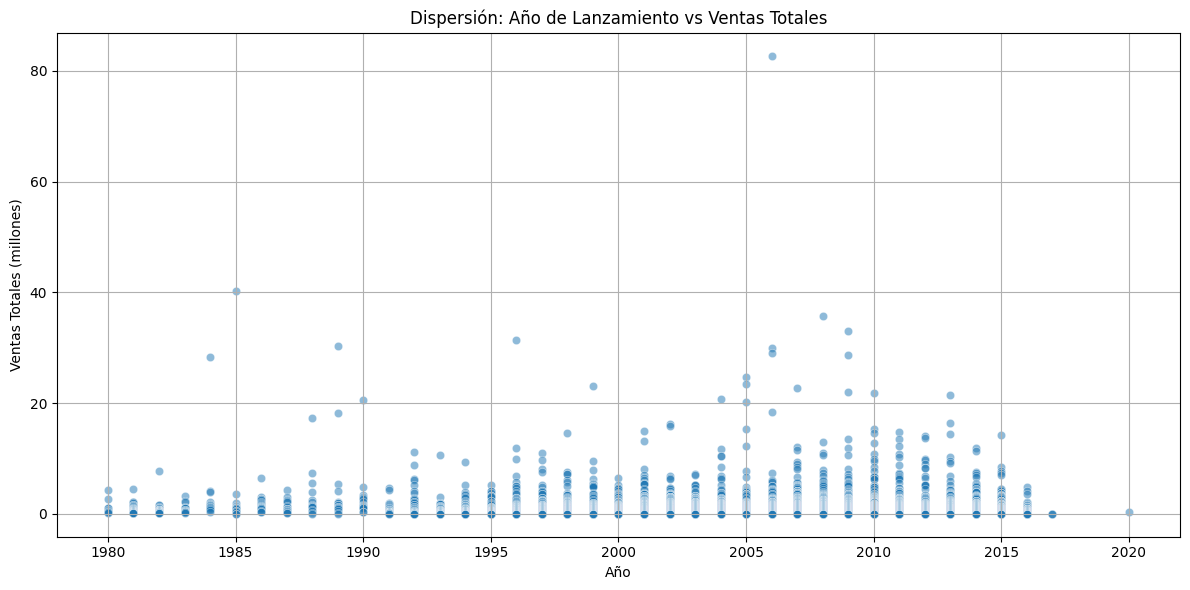

In [114]:
# Gráficamos la dispersión para ver cómo se distribuyen las ventas por año
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtrado, x='Año', y='Total_Ventas', alpha=0.5)

plt.title('Dispersión: Año de Lanzamiento vs Ventas Totales')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pregunta 16.
#### ¿Cómo se puede visualizar la evolución de las ventas por año? (Ej: línea de tiempo)

In [119]:
# Agrupamos por año y sumar las ventas globales
ventas_anuales = df_filtrado.groupby('Año')['Total_Ventas'].sum().reset_index()
ventas_anuales.head()

,Año,Total_Ventas
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


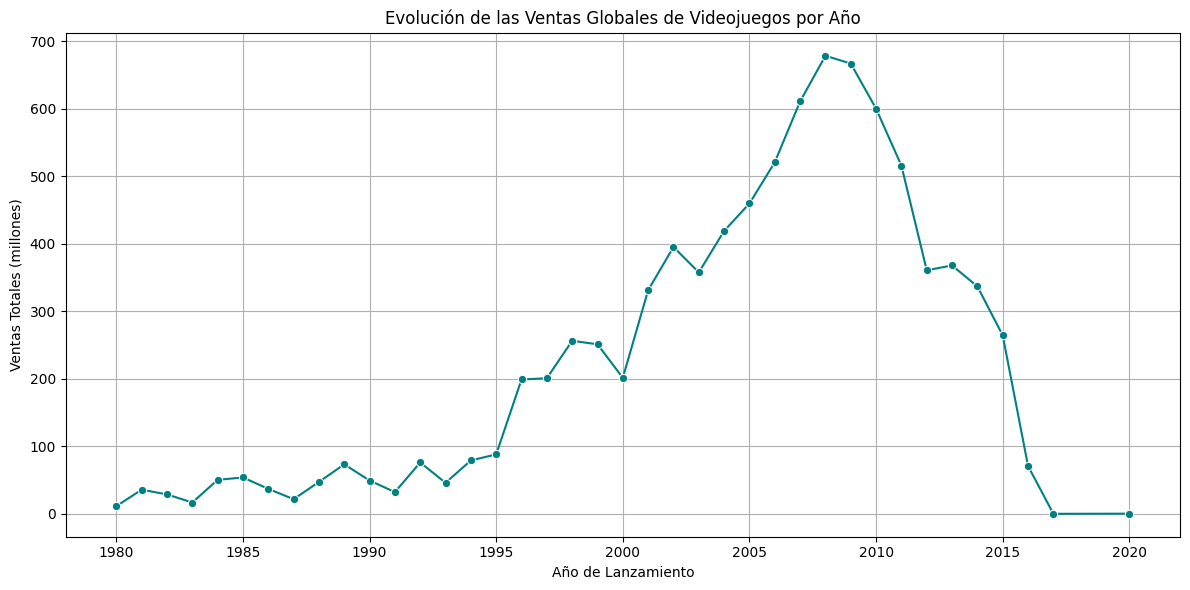

In [123]:
# Gráficamos la línea para la evolución de las ventas globales por año
plt.figure(figsize=(12, 6)) # tamaño personalizado
## Creamos una línea con puntos que muestra la evolución de las ventas globales por año
sns.lineplot(data=ventas_anuales, x='Año', y='Total_Ventas', marker='o', color='teal')

plt.title('Evolución de las Ventas Globales de Videojuegos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True) # Activamos la cuadrícula 
plt.tight_layout() # Ajusta automáticamente los márgenes 
plt.show()

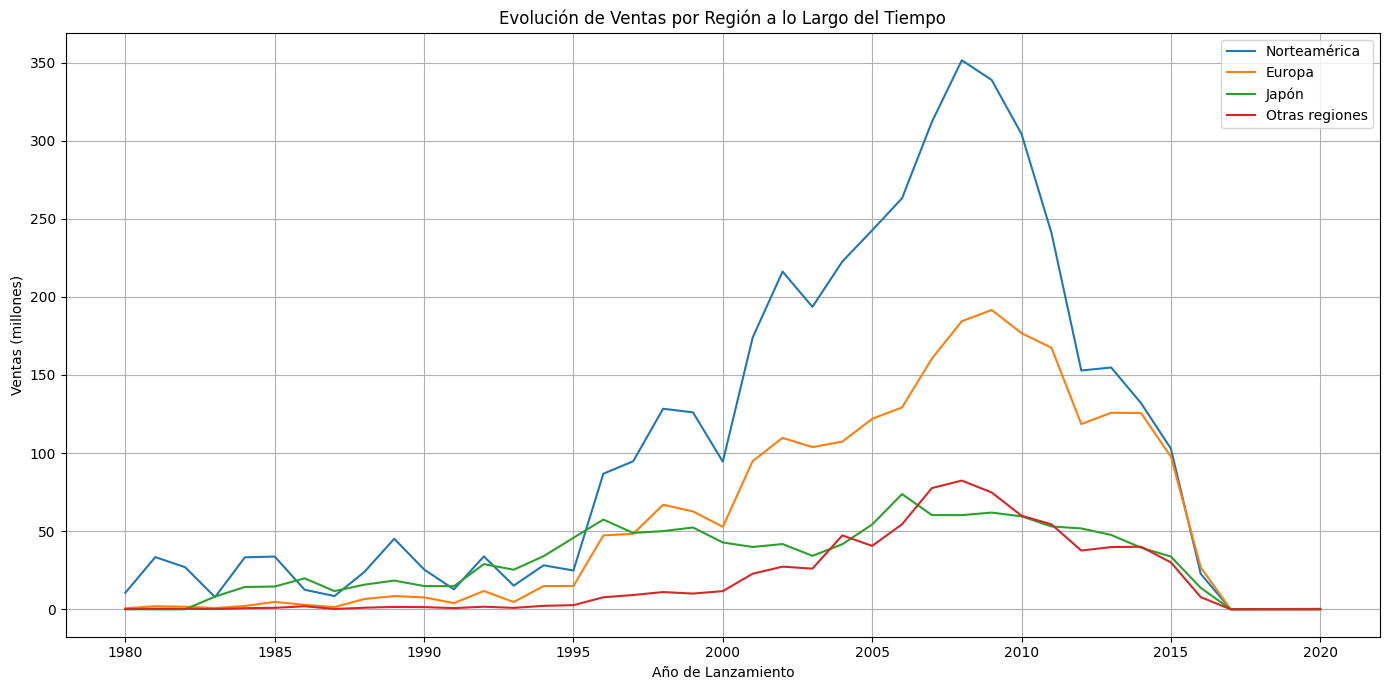

In [122]:
# PARA PROFUNDIZAR HAREMOS EL GRAFICO CON REGIONES
# Agrupamos por año y sumar ventas por región
ventas_regiones = df_filtrado.groupby('Año')[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].sum().reset_index()

# Gráfico de líneas para cada región
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_regiones, x='Año', y='NA_Ventas', label='Norteamérica')
sns.lineplot(data=ventas_regiones, x='Año', y='EU_Ventas', label='Europa')
sns.lineplot(data=ventas_regiones, x='Año', y='JP_Ventas', label='Japón')
sns.lineplot(data=ventas_regiones, x='Año', y='Otras_Ventas', label='Otras regiones')

plt.title('Evolución de Ventas por Región a lo Largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Pregunta 17.
#### ¿Qué gráfico usarías para comparar ventas por género en cada región?

la mejor opcion es el grafico de barras agrupadas

In [131]:
# Agrupamos por género y sumamos las ventas por región
ventas_genero_region = df_videojuegos.groupby('Genero')[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].sum().reset_index()
ventas_genero_region.head()

,Genero,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas
0,Action,877.83,525.00,159.95,187.38
1,Adventure,105.80,64.13,52.07,16.81
2,Fighting,223.59,101.32,87.35,36.68
3,Misc,410.24,215.98,107.76,75.32
4,Platform,447.05,201.63,130.77,51.59


In [132]:
# Reorganizamos el DataFrame para facilitar el gráfico 
ventas_genero_melted = pd.melt(ventas_genero_region, 
                               id_vars='Genero', 
                               value_vars=['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas'],
                               var_name='Región', 
                               value_name='Ventas')
ventas_genero_melted.head()

,Genero,Región,Ventas
0,Action,NA_Ventas,877.83
1,Adventure,NA_Ventas,105.80
2,Fighting,NA_Ventas,223.59
3,Misc,NA_Ventas,410.24
4,Platform,NA_Ventas,447.05


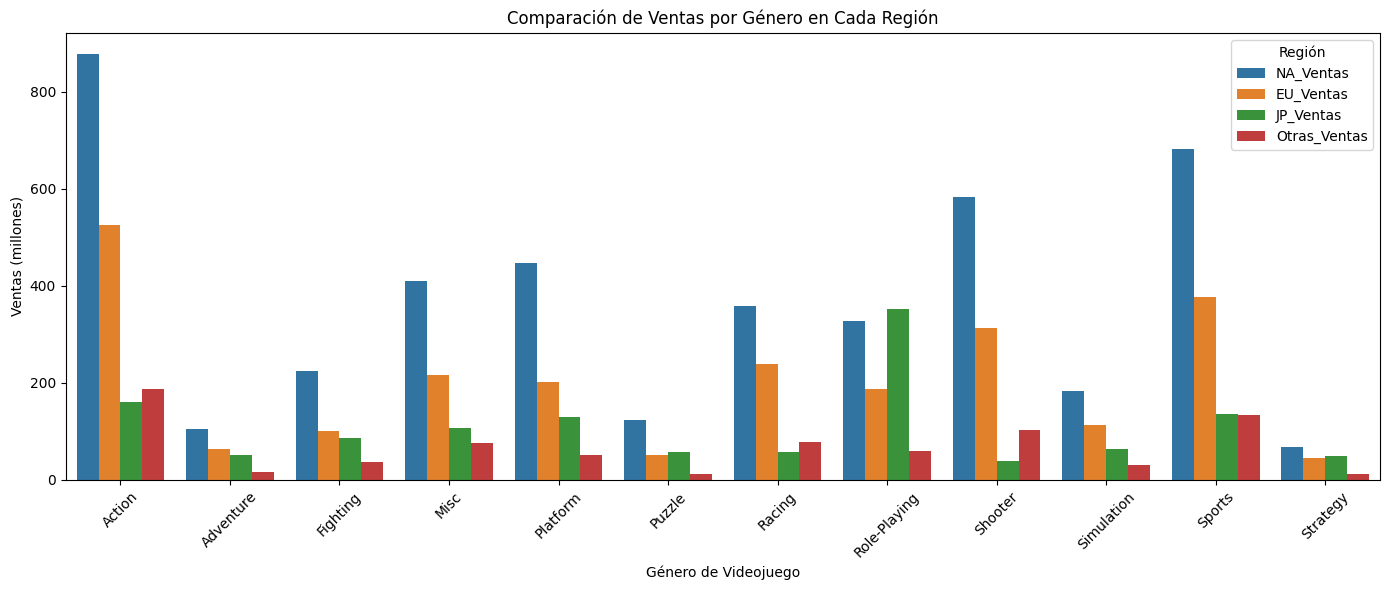

In [134]:
# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(14, 6))

# Usamos seaborn para crear las barras
sns.barplot(data=ventas_genero_melted, x='Genero', y='Ventas', hue='Región')

# Título y etiquetas
plt.title('Comparación de Ventas por Género en Cada Región')
plt.xlabel('Género de Videojuego')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

### Pregunta 18.
#### ¿Cuál sería una buena visualización para mostrar los editores top 5 por ventas?

la mejor opcion es el grafico de barras horizontales

In [139]:
# Agrupar por editor y sumar las ventas totales
ventas_editor = df_videojuegos.groupby('Editor')['Total_Ventas'].sum().reset_index()

# Ordenar de mayor a menor y seleccionar el Top 5
top5_editores = ventas_editor.sort_values(by='Total_Ventas', ascending=False).head(5)
top5_editores


,Editor,Total_Ventas
360,Nintendo,1786.54
139,Electronic Arts,1107.76
21,Activision,727.46
457,Sony Computer Entertainment,607.50
526,Ubisoft,474.72


C:\Users\olive\AppData\Local\Temp\ipykernel_23064\544957588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_editores, y='Editor', x='Total_Ventas', palette='viridis')


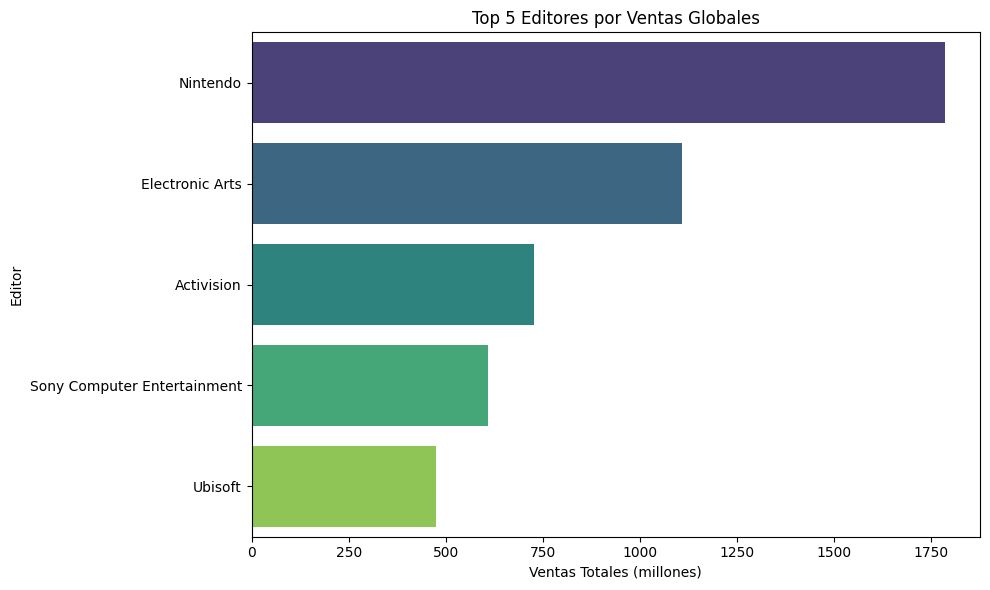

In [140]:
# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))

# Usamos seaborn para las barras
sns.barplot(data=top5_editores, y='Editor', x='Total_Ventas', palette='viridis')

# Título y etiquetas
plt.title('Top 5 Editores por Ventas Globales')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Editor')
plt.tight_layout()
plt.show()


### Pregunta 19.
#### ¿Cómo podrías mostrar la relación entre plataforma y género más vendidos?

el mejor diagrama es el mapa de calor o el mapa de burbujas

In [142]:
# Agrupamos las ventas totales por Plataforma y Género
ventas_plataforma_genero = df_videojuegos.groupby(['Plataforma', 'Genero'])['Total_Ventas'].sum().unstack().fillna(0)
ventas_plataforma_genero.head()

Genero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
3DO Interactive Multiplayer,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
Atari 2600,29.34,1.70,1.24,3.58,13.27,14.68,2.91,0.00,26.48,0.45,3.43,0.00
Dreamcast,1.26,2.50,1.83,0.00,2.54,0.00,2.65,0.68,0.33,0.52,3.66,0.00
Game Boy,7.92,17.16,0.00,13.35,54.91,47.47,4.55,88.24,1.20,3.55,9.05,8.05
Game Boy Advance,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45


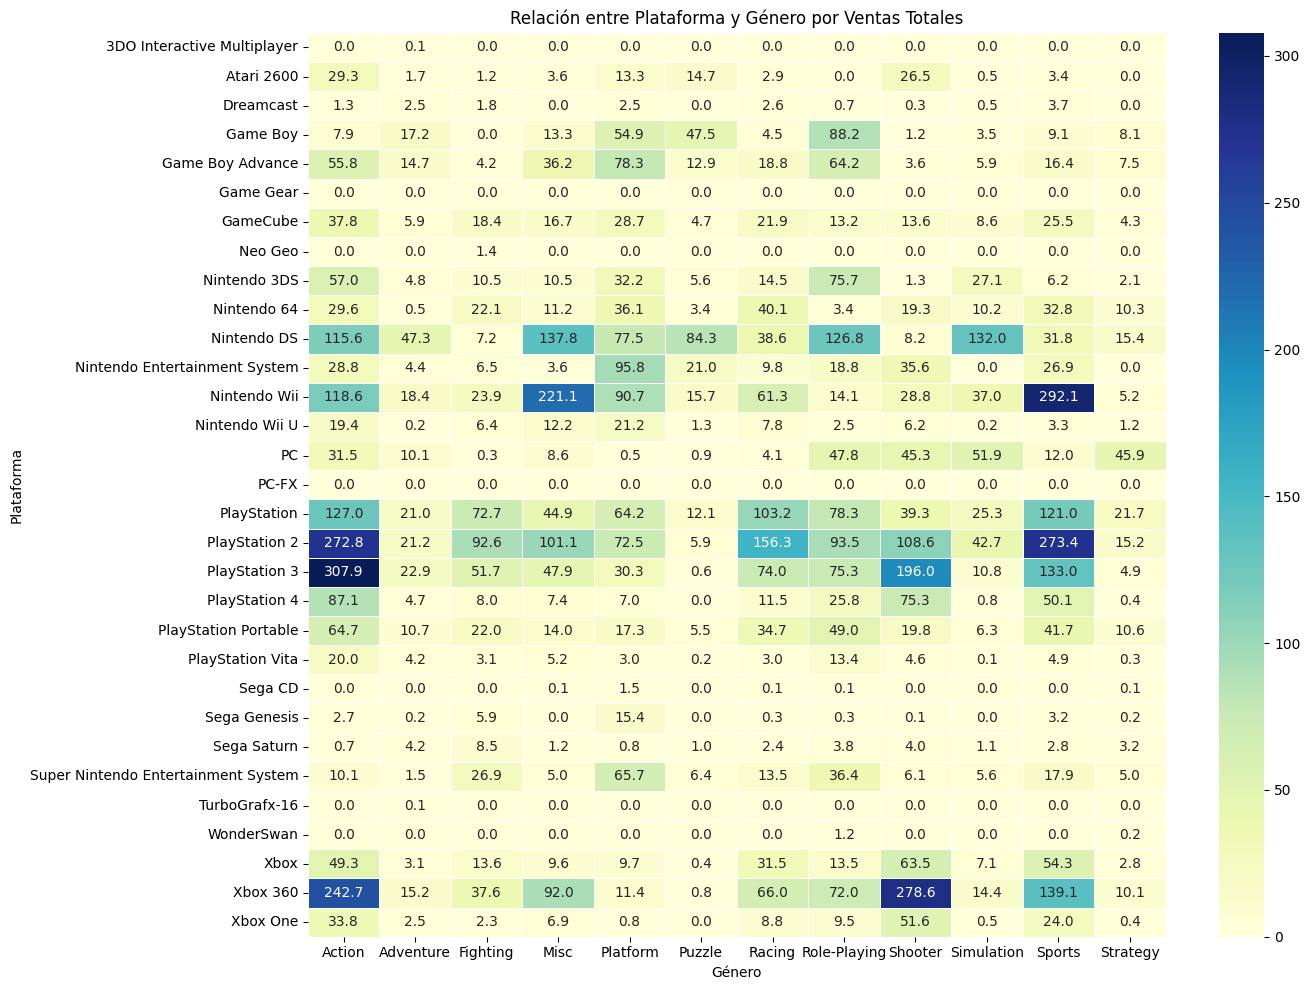

In [143]:
# Crear el MAPA DE CALOR
plt.figure(figsize=(14, 10))
sns.heatmap(ventas_plataforma_genero, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".1f")

plt.title('Relación entre Plataforma y Género por Ventas Totales')
plt.xlabel('Género')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()


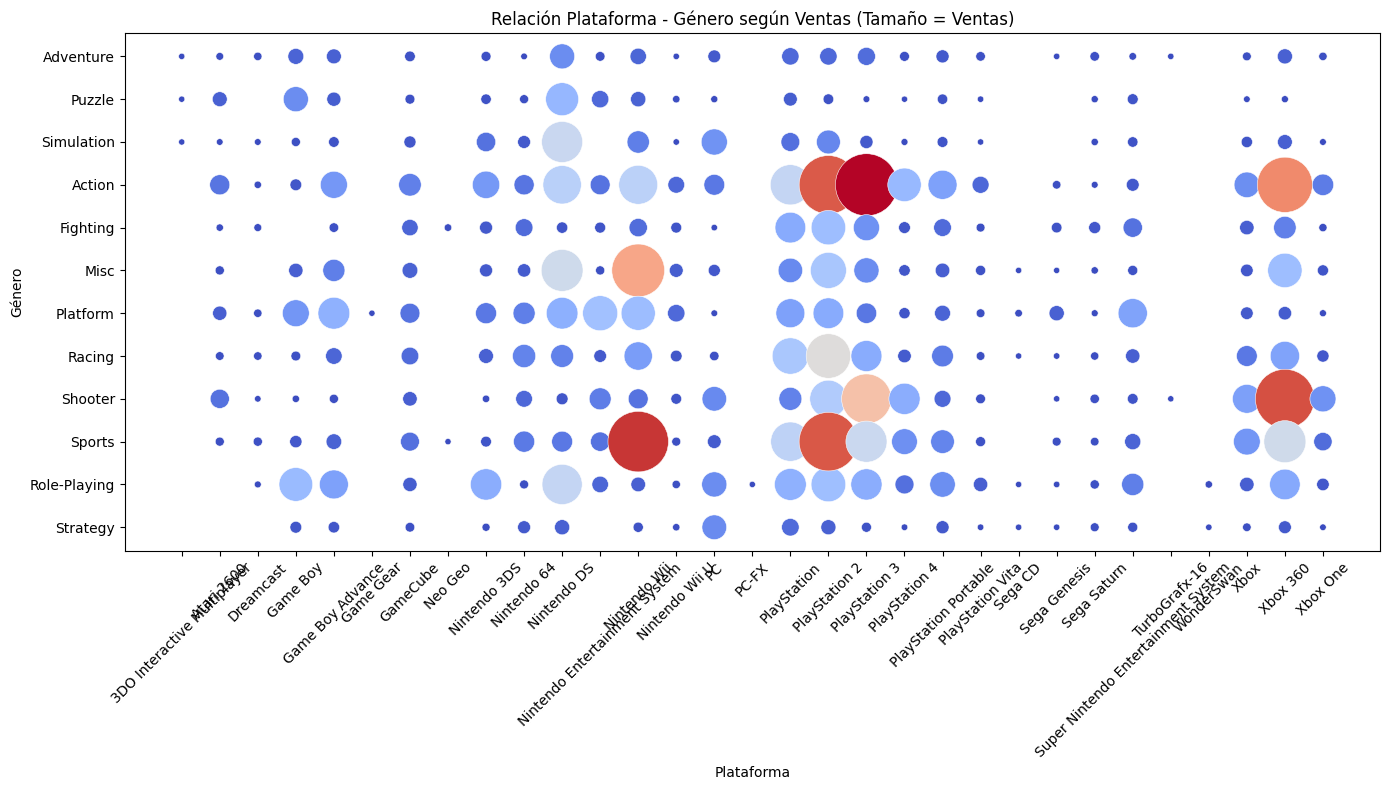

In [146]:
# Agrupamos de nuevo por plataforma y género
ventas_bg = df_videojuegos.groupby(['Plataforma', 'Genero'])['Total_Ventas'].sum().reset_index()

# Crear gráfico de burbujas
plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=ventas_bg, 
    x='Plataforma', 
    y='Genero', 
    size='Total_Ventas', 
    sizes=(20, 2000), 
    hue='Total_Ventas', 
    palette='coolwarm', 
    legend=False)

plt.title('Relación Plataforma - Género según Ventas (Tamaño = Ventas)')
plt.xlabel('Plataforma')
plt.ylabel('Género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pregunta 20.
#### ¿Qué visualización sería útil para mostrar los juegos con mayor discrepancia de ventas entre regiones?

la mejor opcion seria el grafico de barras agrupadas

In [156]:
# Creamos una columna con la diferencia entre la región con más y la que menos ventas por juego
df_videojuegos['Max_Ventas'] = df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].max(axis=1)
df_videojuegos['Min_Ventas'] = df_videojuegos[['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']].min(axis=1)
df_videojuegos['Discrepancia'] = df_videojuegos['Max_Ventas'] - df_videojuegos['Min_Ventas']

# Seleccionamos los 10 juegos con mayor discrepancia
top_discrepantes = df_videojuegos.sort_values(by='Discrepancia', ascending=False).head(10)
top_discrepantes = top_discrepantes[['Nombre', 'NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas']]
top_discrepantes

,Nombre,NA_Ventas,EU_Ventas,JP_Ventas,Otras_Ventas
0,Wii Sports,41.49,29.02,3.77,8.46
1,Super Mario Bros.,29.08,3.58,6.81,0.77
9,Duck Hunt,26.93,0.63,0.28,0.47
5,Tetris,23.20,2.26,4.22,0.58
15,Kinect Adventures!,14.97,4.94,0.24,1.67
3,Wii Sports Resort,15.75,11.01,3.28,2.96
2,Mario Kart Wii,15.85,12.88,3.79,3.31
8,New Super Mario Bros. Wii,14.59,7.06,4.70,2.26
18,Super Mario World,12.78,3.75,3.54,0.55
7,Wii Play,14.03,9.20,2.93,2.85


In [157]:
# Reorganizamos el DataFrame para formato largo (melt)
top_discrepantes_melted = pd.melt(top_discrepantes, 
                                  id_vars='Nombre', 
                                  value_vars=['NA_Ventas', 'EU_Ventas', 'JP_Ventas', 'Otras_Ventas'],
                                  var_name='Región', 
                                  value_name='Ventas')

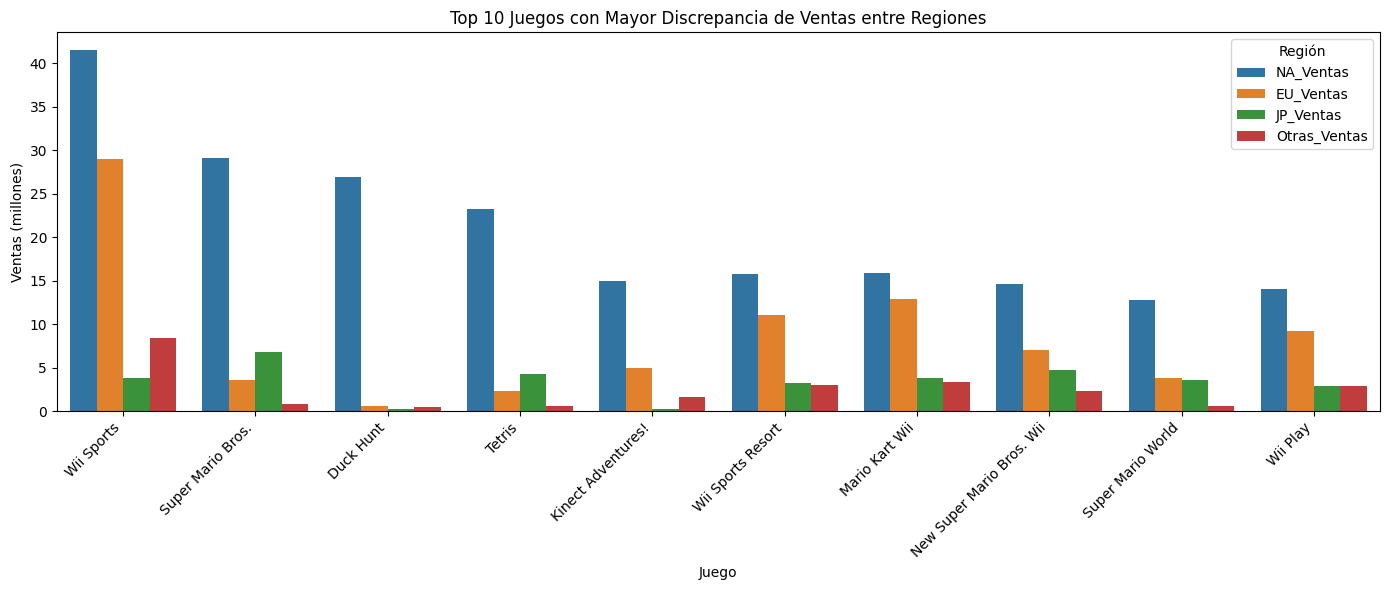

In [159]:
# Gráfico de barras agrupadas para cada juego
plt.figure(figsize=(14, 6))
sns.barplot(data=top_discrepantes_melted, x='Nombre', y='Ventas', hue='Región')

plt.title('Top 10 Juegos con Mayor Discrepancia de Ventas entre Regiones')
plt.xlabel('Juego')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

## Cierre del Análisis de Ventas de Videojuegos
### Objetivo del proyecto
El objetivo fue analizar un dataset de ventas de videojuegos con enfoque en:
- Limpieza y transformación de datos.
- Análisis exploratorio.
- Visualización para responder preguntas clave sobre ventas globales, preferencias regionales, plataformas, géneros y editores.


### Procesamiento de datos
- Se detectaron y trataron valores nulos, especialmente en las columnas de año y editor.
- Se aseguraron los tipos de datos correctos para permitir análisis numéricos y temporales.
- Se filtraron juegos sin datos de ventas.

---

### Principales hallazgos

#### Ventas globales
- El editor con más ventas globales fue Nintendo.
- La plataforma más vendida fue PS2, seguida de X360 y Wii.
- Las ventas globales tuvieron un pico entre 2007 y 2010, y luego empezaron a caer.

#### Regiones
- Norteamérica lidera en ventas regionales, seguido de Europa.
- Japón tiene preferencias únicas (más ventas de RPG y títulos como Pokémon).
- Juegos como "Wii Sports" o "Mario Kart Wii" fueron exitosos globalmente, pero con variaciones notables por región.

#### Géneros
- El género más vendido globalmente fue Acción, seguido de Deportes.
- RPG fue dominante en Japón, mientras que Shooter y Sports dominaron en NA/EU.

#### Relaciones interesantes
- Hay relación entre plataforma y género: por ejemplo, RPG es fuerte en consolas PlayStation, mientras que Wii tiene más ventas de Party y Sports.
- Los juegos con mayor discrepancia de ventas entre regiones muestran preferencias culturales claras.

---

## Conclusiones
- El mercado presenta diferencias regionales clave que impactan decisiones de marketing y localización.
- Las mayores ventas se concentraron entre 2006-2010, posiblemente por el auge de consolas como Wii, PS3, X360.
- Los géneros y plataformas más populares cambian con el tiempo y entre regiones.

---

## Aprendizajes Personales
- Fortalecí habilidades en limpieza y exploración de datos con Pandas.
- Desarrollé visualizaciones efectivas con Seaborn y Matplotlib.
- Mejoré mi capacidad de análisis e interpretación de datos para comunicar resultados significativos.
